# Part 1: Python Data Manipulation and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in CSV here
life_expectancy_data = pd.read_csv("Life Expectancy Data.csv")
life_expectancy_data_2015 = life_expectancy_data[life_expectancy_data["Year"] == 2015]
#print(life_expectancy_data_2015)

Question 1.1 (5 points): Plot the boxplot for life expectancy in developing and developed countries in 2015. Label y-axis and change xticks to appropriate labels for the boxes (Developing and Developed). You should have two boxes in the plot: one for developing and one for developed.

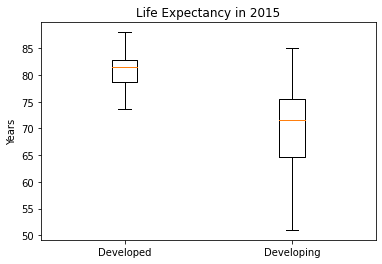

In [3]:
statuses = np.unique(life_expectancy_data_2015["Status"]) #Developed, Developing
expectancies = []

for status in statuses:
    expectancy = np.array(life_expectancy_data_2015[life_expectancy_data_2015["Status"] == status]["Life_expectancy"])
    expectancies.append(expectancy)

plt.boxplot(expectancies)
plt.xticks(range(1,len(statuses)+1), statuses)
plt.ylabel("Years")
plt.title('Life Expectancy in 2015')
plt.show()

Question 1.2 (5 points): Create a scatter plot between life expectancy and GDP in 2015.
Label axes appropriately.

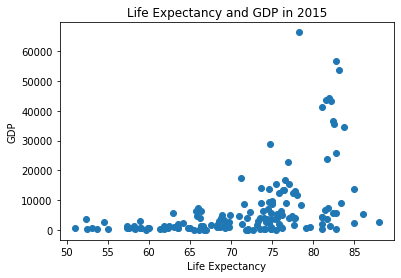

In [4]:
expectancies = np.array(life_expectancy_data_2015["Life_expectancy"])
gdp = np.array(life_expectancy_data_2015["GDP"])
plt.scatter(expectancies, gdp)
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")
plt.title('Life Expectancy and GDP in 2015')
plt.show()

Question 1.3 (10 points): Create a stacked histogram for BMI in 2015, where the stacked
bars are on status (developed and developing). Don’t forget to include a legend.

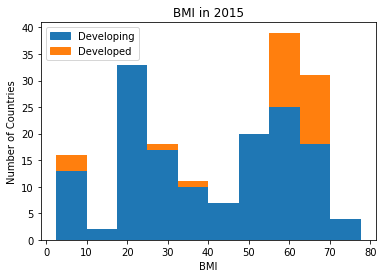

In [5]:
developed_bmi = np.array(life_expectancy_data_2015[life_expectancy_data_2015["Status"] == "Developed"]["BMI"])
developing_bmi = np.array(life_expectancy_data_2015[life_expectancy_data_2015["Status"] == "Developing"]["BMI"])

#Legend
#Source: https://stackoverflow.com/questions/43872450/matplotlib-histogram-with-multiple-legend-entries
labels = ["Developing", "Developed"]
colors = {'Developing': '#1f77b4', 'Developed':'#ff7f0e'}
handles = [plt.Rectangle((0,0), 1, 1, color=colors[label]) for label in labels]

plt.hist([developing_bmi, developed_bmi], stacked=True)
plt.xlabel("BMI")
plt.ylabel("Number of Countries")
plt.title('BMI in 2015')
plt.legend(handles, labels)
plt.show()

Question 1.4 (10 points): Create a solid line plot showing the average (across all nations)
life expectancy changing over time, with the standard deviation above and below shown with
filled between plot (use fill between plotting function with alpha = 0.3). Additionally, plot
the maximum life expectancy for each year and the minimum life expectancy for each year
as dotted line plots over time. Include legend for mean, minimum, and maximum, and don’t
forget axes labels.

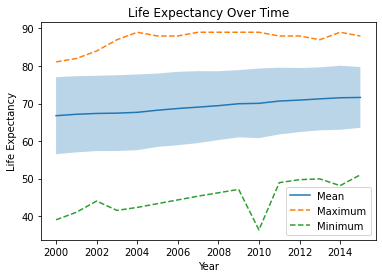

In [6]:
years = np.unique(life_expectancy_data["Year"])
mean = []
high_standard_deviation = []
low_standard_deviation = []
max_expectancy = []
min_expectancy = []

for year in years:
    expectancies = np.array(life_expectancy_data[life_expectancy_data["Year"] == year]["Life_expectancy"])
    
    #Remove NaN life expectancies
    for expectancy_index in range(len(expectancies)):
        if expectancy_index < len(expectancies) and np.isnan(expectancies[expectancy_index]):
            expectancies = np.delete(expectancies, expectancy_index)

    #Calculations
    mean.append(np.mean(expectancies))
    high_standard_deviation.append(np.mean(expectancies) + np.std(expectancies))
    low_standard_deviation.append(np.mean(expectancies) - np.std(expectancies))
    max_expectancy.append(expectancies.max())
    min_expectancy.append(expectancies.min())


plt.plot(years, mean, label="Mean")
plt.fill_between(years, high_standard_deviation, low_standard_deviation, alpha=0.3)
plt.plot(years, max_expectancy, "--", label="Maximum")
plt.plot(years, min_expectancy, "--", label="Minimum")
plt.title("Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()


Question 1.5 (15 points): Extract Hepatitis B, Polio, Measles, BMI, Diphtheria, HIV/AIDS
for 2015 and remove the rows with NaN elements (use dropna()). Create the correlation
coefficient matrix (use np.corrcoef()) and create a heatmap showing the correlations, using
pcolor() and matplotlib. Label the rows and columns with the appropriate diseases. Include
a colorbar and a label on the colorbar. Which of these two are the most heavily correlated?

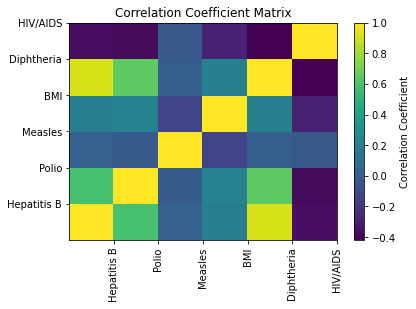

In [7]:
#Remove NaNs
extracted = life_expectancy_data_2015[['Hepatitis_B', 'Polio', 'Measles', 'BMI', 'Diphtheria', 'HIV/AIDS']]
extracted = extracted.dropna()

hepatitis = np.array(extracted['Hepatitis_B'])
polio = np.array(extracted['Polio'])
measles = np.array(extracted['Measles'])
bmi = np.array(extracted['BMI'])
diphtheria = np.array(extracted['Diphtheria'])
hiv = np.array(extracted['HIV/AIDS'])

#Correlation Coefficient Matrix 
items = [hepatitis, polio, measles, bmi, diphtheria, hiv]
matrix = np.corrcoef(items)

#Heatmap
labels = ["Hepatitis B", "Polio", "Measles", "BMI", "Diphtheria", "HIV/AIDS"]
plt.xticks(range(1,len(labels)+1), labels, rotation='vertical')
plt.yticks(range(1,len(labels)+1), labels)
plt.title("Correlation Coefficient Matrix")
plt.pcolor(matrix)
cbar = plt.colorbar()
cbar.set_label("Correlation Coefficient")
plt.show()